In [15]:
from sklearn.datasets import make_regression, make_classification
from xgboost import XGBClassifier
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

<font size='8'>Loss functions </font>

>The cost function reduces all the various good and bad aspects of a possibly complex system down to a single number, a scalar value, which allows candidate solutions to be ranked and compared." </br>
 Neural Smithing: Supervised Learning in Feedforward Artificial Neural Networks, 1999.

Informally:  Loss functions are a measurement of how good the given model is in terms of predicting the outcome. Machine learning algorithms minimise the loss.

Formally: </br>
&nbsp;&nbsp;&nbsp;&nbsp;$X \in \mathbb{R}^k $ : Real valued random imput vector (k features for one datapoint). <br>
&nbsp;&nbsp;&nbsp;&nbsp;$Y \in \mathbb{R} $ : Real valued random output variable <br>
&nbsp;&nbsp;&nbsp;&nbsp;$Pr(X,Y)$ : joint distribution <br>
&nbsp;&nbsp;&nbsp;&nbsp;We seek a function $f(X)$ for predicting $Y$ given values of the input $X$.  <br>
&nbsp;&nbsp;&nbsp;&nbsp;To penalise errors in prediction (depending on their magnitude and/or direction), we need a $\textit{loss function}: L(Y,f(X))$.

Sometimes the loss function is also referred to as "cost function", "objective function".

The **choice of loss function** depends on the type of problem (regression/classification) and the distribution of the data.

This notebook explores the most common loss functions. Note, for unique problems tailor made loss functions can be essential, one example is [triplet loss for one-shot learning](https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=&cad=rja&uact=8&ved=2ahUKEwiLlObDmMz-AhUDV6QEHV07BZIQFnoECAwQAQ&url=https%3A%2F%2Fmedium.com%2F%40crimy%2Fone-shot-learning-siamese-networks-and-triplet-loss-with-keras-2885ed022352&usg=AOvVaw2xLpyKbiKc6lEnx6tEgDxO) used in face recognition.


## Loss functions for regression

### Mean squared error (MSE)
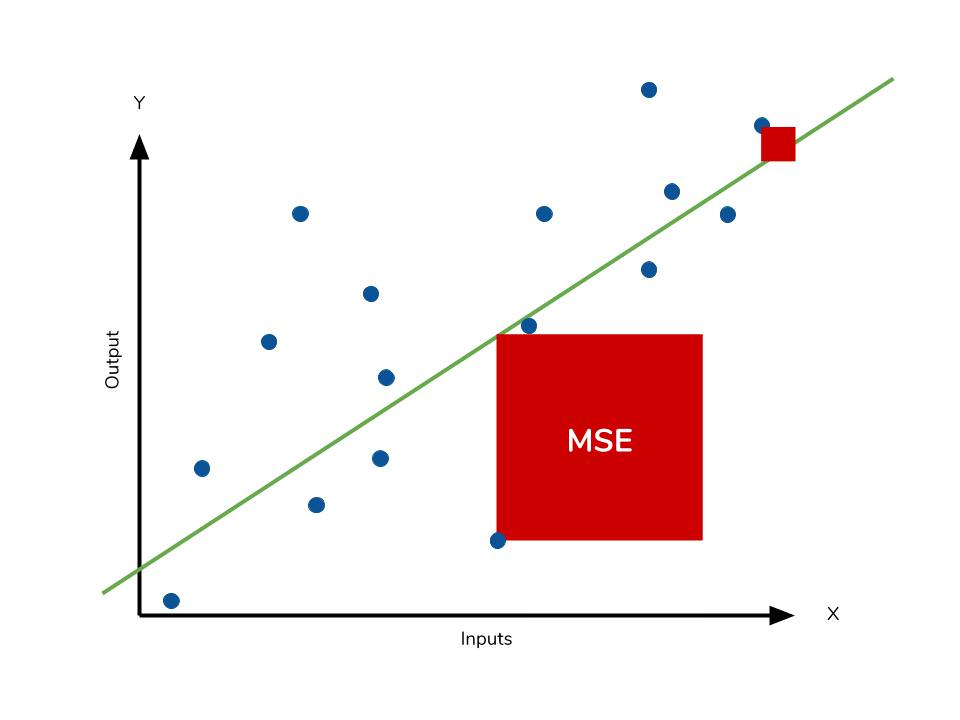

$MSE = \frac{1}{n} \sum_{i=1}^{n}{(y_i-\hat{y_i})^2}$

| Advantages                         | Disadvantages         |
|------------------------------------|-----------------------|
| Large errors get penalised heavily | Sensitive to outliers |
| Mathematical convenience (differentialble, connection to variance) |  |


</br>

### Mean absolute error (MAE)
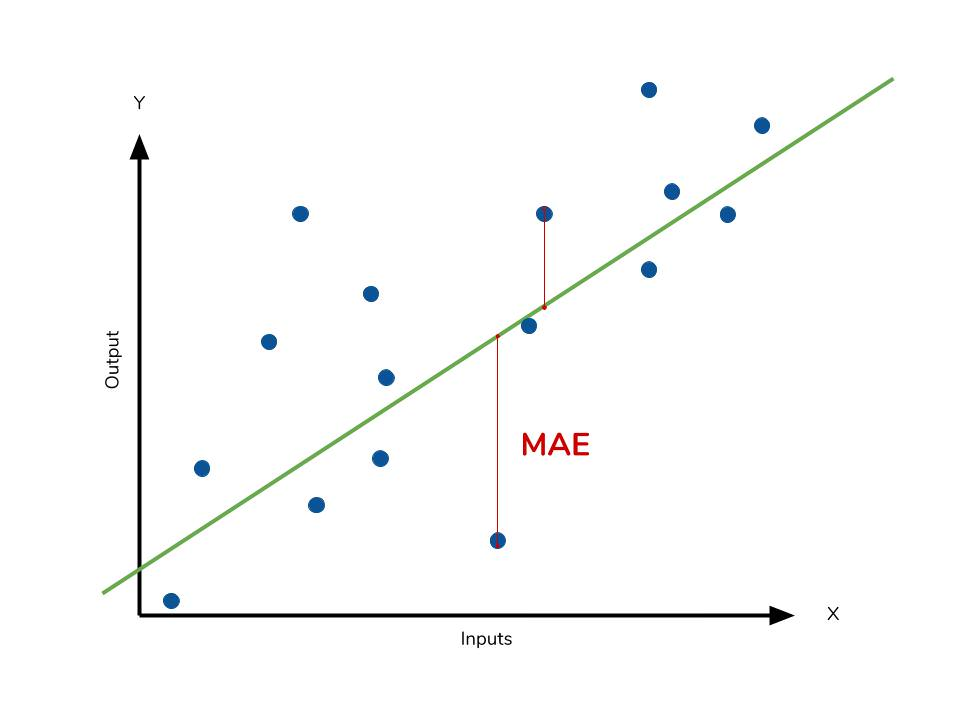

$MAE = \frac{1}{n} \sum_{i=1}^{n}{|y_i-\hat{y_i}|}$

| Advantages                         | Disadvantages         |
|------------------------------------|-----------------------|
| More robust to outliers | Non-differentialble  |
| Has the same units as the output variable | |

</br>

### Root mean squared error (RMSE)

$RMSE = \sqrt{\frac{1}{n} \sum_{i=1}^{n}{(y_i-\hat{y_i})^2}}$

| Advantages                         | Disadvantages         |
|------------------------------------|-----------------------|
| Has the same units as the output variable | Sensitive to outliers |
| Differentiable | |

</br>

### Mean Squared Logarithmic Error (MSLE)
It can also be interpreted as a measure of the ratio between the actual and predicted values.

$MSLE = \frac{1}{n} \sum_{i=1}^{n}(\log{(y_i+1)}-\log{(\hat{y_i}+1)})^2 \\
= \frac{1}{n} \sum_{i=1}^{n}(\log{(\frac{y_i+1}{\hat{y_i}+1})})^2$

| Advantages                         | Disadvantages         |
|------------------------------------|-----------------------|
| Punishes errors in proportion to the true value, therefore robust to outliers. | Penalises underestimates more heavily |
| This metric is best to use when the target has an exponential distribution. | |


The squared root version, RMSLE is also used in similar situations.
</br>

### Mean Absolute Percentage Error (MAPE)
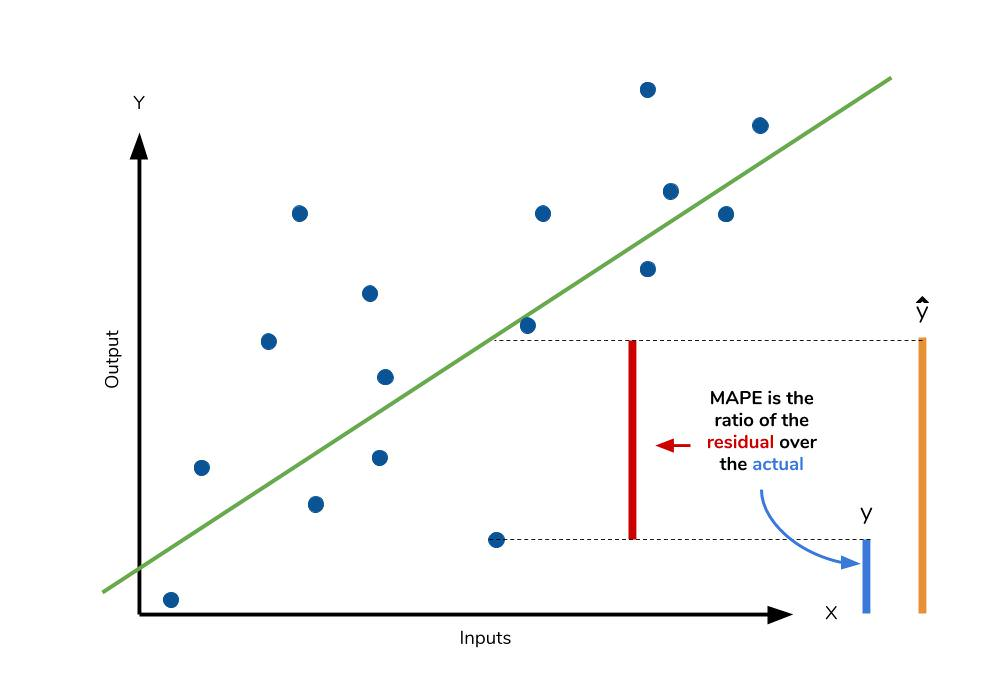

| Advantages                         | Disadvantages         |
|------------------------------------|-----------------------|
| Is not changed by a global scaling of the target variable. | Not suitable if there are many values near zero. |


$MAPE = \frac{1}{n} \sum_{i=1}^{n}{\frac{|y_i-\hat{y_i}|}{\max{(\epsilon, |y_i|)}}}$

Where $\epsilon$ is an arbitrarily small positive number.

### Mean Percentage Error (MPE)
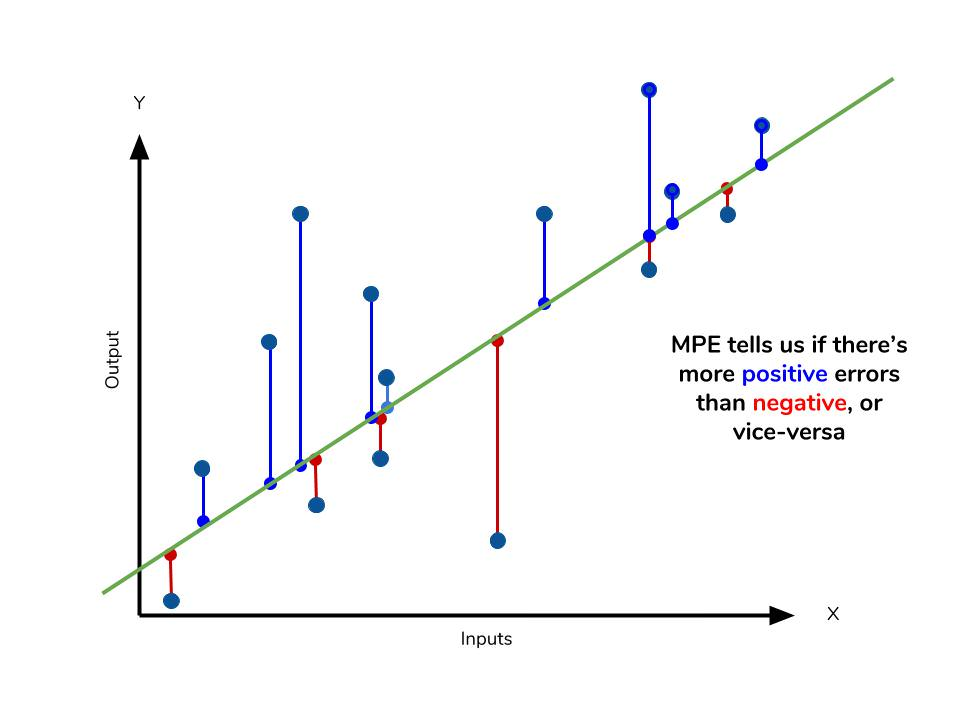

| Advantages                         | Disadvantages         |
|------------------------------------|-----------------------|
| Detects systematic overestimation and underestimation. (Positive and negative errors cancel each other.)| Not suitable if there are many values near zero. |
| | Can be difficult to interpret/misleading|


$MPE = \frac{1}{n} \sum_{i=1}^{n}{\frac{y_i-\hat{y_i}}{\max{(\epsilon, y_i)}}}$

Where $\epsilon$ is an arbitrarily small positive number.



Source of figures: https://www.dataquest.io/blog/understanding-regression-error-metrics/

### A small example

In [8]:
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error, mean_squared_error,  mean_squared_log_error 

print("Small example of values of different loss functions:")

y_true = [1, 10, 20, 1e6]
y_pred = [0.9, 15, 18, 1.05e6]
print("True values:      ", y_true)
print("Predicted values: ", y_pred)
print("MSE: ", mean_squared_error(y_true, y_pred).round(2))
print("MAE: ", mean_absolute_error(y_true, y_pred).round(2))
print("MSLE: ", mean_squared_log_error(y_true, y_pred).round(3))
print("MAPE: ", mean_absolute_percentage_error(y_true, y_pred).round(3))

print()
y_true = [1, 10, 20, 1e6]
y_pred = [0.9, 15, 18, 1.005e6]
print("True values:      ", y_true)
print("Predicted values: ", y_pred)
print("MSE: ", mean_squared_error(y_true, y_pred).round(2))
print("MAE: ", mean_absolute_error(y_true, y_pred).round(2))
print("MSLE: ", mean_squared_log_error(y_true, y_pred).round(3))
print("MAPE: ", mean_absolute_percentage_error(y_true, y_pred).round(3))

Small example of values of different loss functions:
True values:       [1, 10, 20, 1000000.0]
Predicted values:  [0.9, 15, 18, 1050000.0]
MSE:  625000007.25
MAE:  12501.78
MSLE:  0.039
MAPE:  0.188

True values:       [1, 10, 20, 1000000.0]
Predicted values:  [0.9, 15, 18, 1005000.0]
MSE:  6250007.25
MAE:  1251.78
MSLE:  0.038
MAPE:  0.176


## Classification - Categorical Cross-Entropy Loss

### Motivation

Cross-entropy is a measure from the field of information theory, building upon entropy and generally calculating the difference between two probability distributions. Roughly speaking, it is the number of bits required to represent or transmit an average event from one distribution compared to another distribution.

**Entropy** H(x) can be calculated for a random variable with a set of x in X discrete states discrete states and their probability P(x) as follows:

H(X) = – sum x in X (P(x) * log(P(x)))

**Cross-entropy** can be calculated using the probabilities of the events from P and Q, as follows:

H(P, Q) = – sum x in X P(x) * log(Q(x))

Where P(x) is the probability of the event x in P, Q(x) is the probability of event x in Q.

Expected Probability (y): The known probability of each class label for an example in the dataset (P). </br>
Predicted Probability (yhat): The probability of each class label an example predicted by the model (Q).

H(P, Q) = – sum x in X P(x) * log(Q(x)) </br>
H(P, Q) = – (P(class0) * log(Q(class0)) + P(class1) * log(Q(class1)))

### The categorical cross-entropy loss function

The model provides a prediction between 0 and 1 for all possible categories (eg. [0.1, 0.03, 0.87]), it needs to be evaluated how close these are to the true values [0, 0, 1].

$CCE = -\sum_{i=1}^{n}{\sum_{j=1}^{k}{y_{j,i} \log{\hat{y_{i,j}}}}}$

$y_{j,i}$: The observed probability that the $i$th element is in category $j$. </br>
$y_{j,i}$: The predicted probability that the $i$th element is in category $j$.


Source: https://machinelearningmastery.com/cross-entropy-for-machine-learning/




In [11]:
from math import log

# define classification data
p = [1, 1, 1, 1, 1, 0, 0, 0, 0, 0]
q = [0.8, 0.9, 0.9, 0.6, 0.8, 0.1, 0.4, 0.2, 0.1, 0.3]


# calculate cross entropy
def cross_entropy(p, q):
    # print(p,q)
    return -sum([p[i]*log(q[i]) for i in range(len(p))])

# calculate cross entropy for each example
results = list()
for i in range(len(p)):
    # create the distribution for each event {0, 1}
    expected = [1.0 - p[i], p[i]]
    predicted = [1.0 - q[i], q[i]]
    # calculate cross entropy for the two events
    ce = cross_entropy(expected, predicted)
    results.append(ce)
print("Categorical cross-entropy of true values\n", p, "\nand predicted values\n", q, "\nis:")
print(round(sum(results),3))

Categorical cross-entropy of true values
 [1, 1, 1, 1, 1, 0, 0, 0, 0, 0] 
and predicted values
 [0.8, 0.9, 0.9, 0.6, 0.8, 0.1, 0.4, 0.2, 0.1, 0.3] 
is:
2.469


## XGBoost

The loss function for model fitting and evaluation can be set separately for XGBoost:
https://xgboost.readthedocs.io/en/latest/parameter.html#learning-task-parameters

In [12]:
from sklearn.datasets import make_regression, make_classification
from xgboost import XGBClassifier, XGBRegressor
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.datasets import fetch_california_housing

In [13]:
X,y = fetch_california_housing(as_frame=True, return_X_y=True)

In [14]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state=1)
evalset = [(X_train, y_train), (X_test,y_test)]

In [16]:
def fit_model_with_objective(X_train, y_train, objective, eval_metric):
    model = XGBRegressor(n_estimators=2000, eta=0.01, objective=objective, eval_metric=eval_metric)
    model.fit(X_train, y_train, eval_set=evalset, verbose=0)
    # evaluate performance
    yhat = model.predict(X_test)
    results = model.evals_result()
    return model, yhat, results

def plot_fit(yhat):
    sns.jointplot(x=y_test,y=yhat,s=10)
    line_min = min(min(y_test),min(yhat))
    line_max = max(max(y_test),max(yhat))
    plt.plot([line_min, line_max], [line_min, line_max], color='black',
        linewidth=0.5)
    plt.show()


Fit of XGB model with objective reg:squarederror


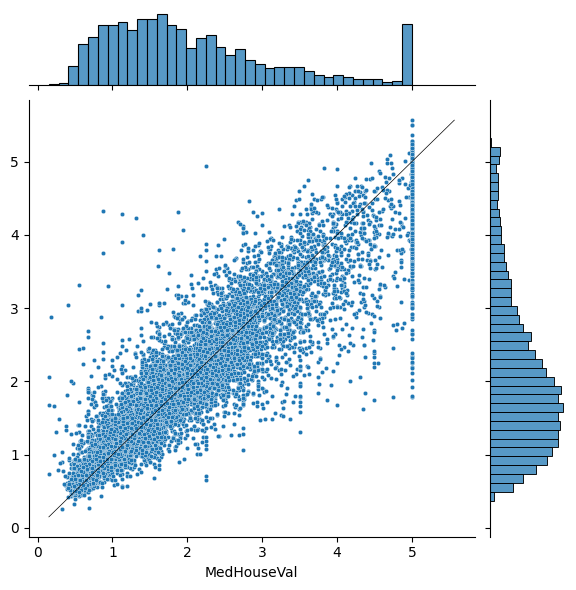

Learning curves with different error metrics


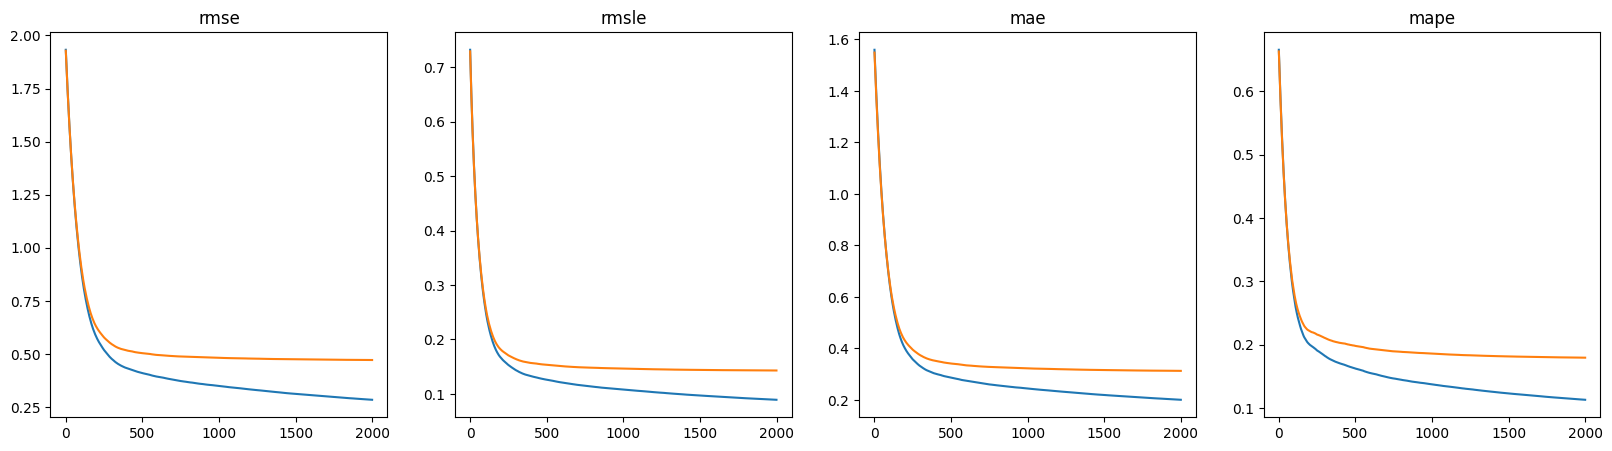

In [17]:
objective='reg:squarederror'
eval_metric=['rmse','rmsle','mae','mape']
model_se, y_hat_se, results = fit_model_with_objective(X_train, y_train, objective=objective, eval_metric=eval_metric)

print("Fit of XGB model with objective", objective)
plot_fit(y_hat_se)

print("Learning curves with different error metrics")
fig, axes = plt.subplots(1, len(eval_metric), figsize=(5*len(eval_metric),5))
for i, m in enumerate(eval_metric):
    ax=axes[i]
    ax.plot(results['validation_0'][m], label='train')
    ax.plot(results['validation_1'][m], label='test')
    ax.set_title(m)
plt.show()

Fit of XGB model with objective reg:gamma


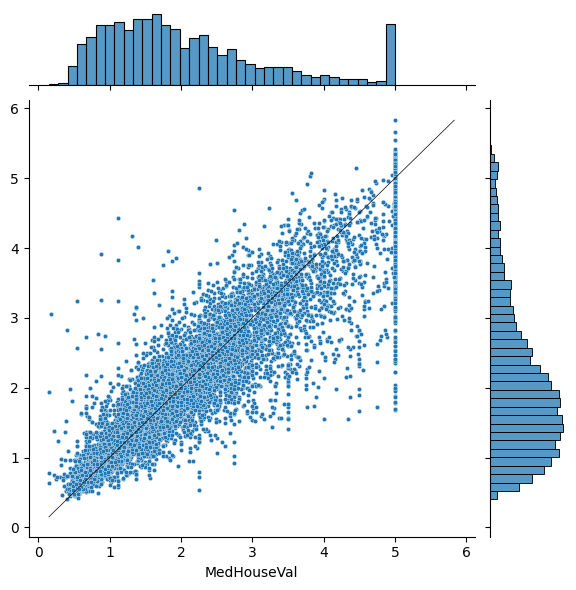

Learning curves with different error metrics


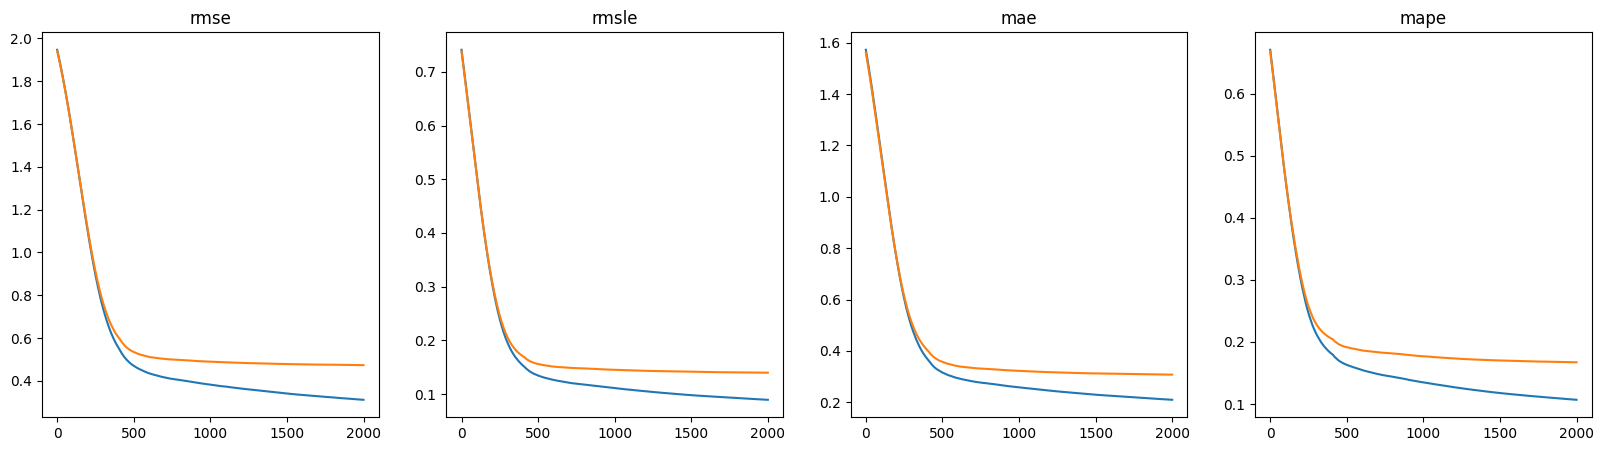

In [18]:
objective='reg:gamma'
eval_metric=['rmse','rmsle','mae','mape']
model_se, y_hat_se, results = fit_model_with_objective(X_train, y_train, objective=objective, eval_metric=eval_metric)

print("Fit of XGB model with objective", objective)
plot_fit(y_hat_se)

print("Learning curves with different error metrics")
fig, axes = plt.subplots(1, len(eval_metric), figsize=(5*len(eval_metric),5))
for i, m in enumerate(eval_metric):
    ax=axes[i]
    ax.plot(results['validation_0'][m], label='train')
    ax.plot(results['validation_1'][m], label='test')
    ax.set_title(m)
plt.show()

### Pseudo Huber loss for XGBoost

The Pseudo-Huber loss function ensures that derivatives are continuous for all degrees.

Note, the target needs to be standardised.

Without scaling


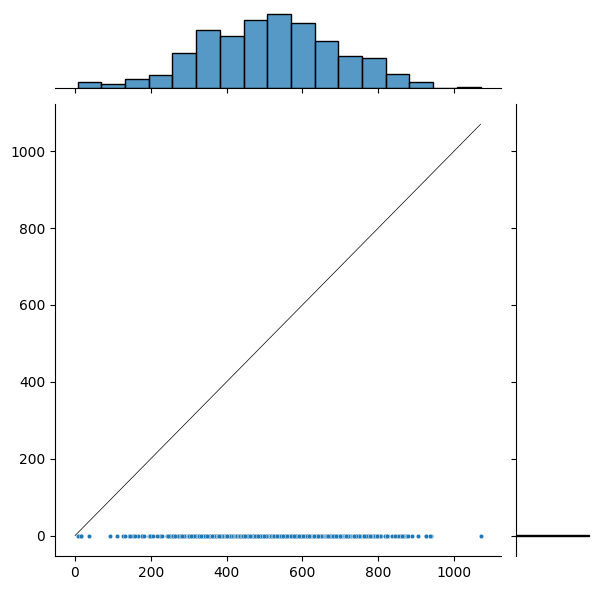

With scaling


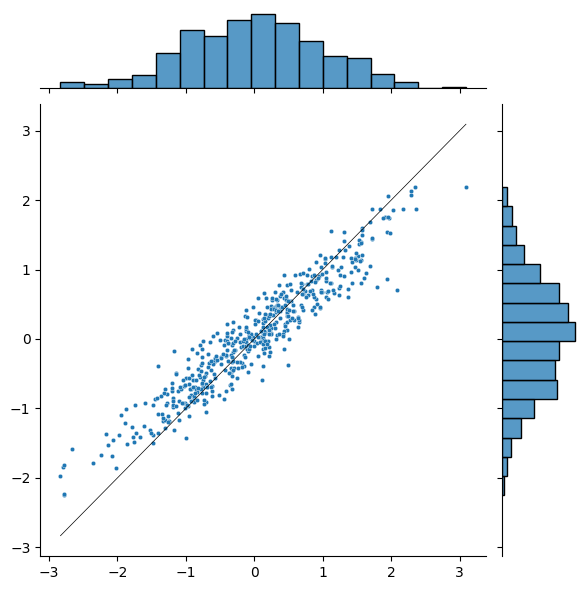

In [ ]:
# define dataset
X, y = make_regression(n_samples=1000, n_features=10, n_informative=10, random_state=1, 
                       noise=0
                       #effective_rank=10, tail_strength=0.9, bias=0.5
                       )
if min(y)<=0:
    y = y-min(y)+0.01
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state=1)
# evalset = [(X_train, y_train), (X_test,y_test)]

print("Trying to use Pseudo Huber loss without standardising target:")
model_tw, y_hat_tw, _ = fit_model_with_objective(X_train, y_train, objective='reg:pseudohubererror', eval_metric='rmse')
plot_fit(y_hat_tw)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
y_train = sc.fit_transform(y_train.reshape(-1, 1)).reshape(1, -1)[0]
y_test = sc.fit_transform(y_test.reshape(-1, 1)).reshape(1, -1)[0]

print("After standardising target:")
model_tw, y_hat_tw, _ = fit_model_with_objective(X_train, y_train, objective='reg:pseudohubererror', eval_metric='rmse')
plot_fit(y_hat_tw)